# Set up

In [0]:
!mkdir doc_data

In [2]:
!unzip data.zip -d doc_data/

Archive:  data.zip
   creating: doc_data/data/
   creating: doc_data/data/aadhar_card/
  inflating: doc_data/data/aadhar_card/1.jpg  
  inflating: doc_data/data/aadhar_card/2.jpg  
  inflating: doc_data/data/aadhar_card/3.jpg  
  inflating: doc_data/data/aadhar_card/4.jpg  
  inflating: doc_data/data/aadhar_card/5.jpg  
  inflating: doc_data/data/aadhar_card/8.jpg  
  inflating: doc_data/data/aadhar_card/10.jpg  
  inflating: doc_data/data/aadhar_card/12.jpg  
  inflating: doc_data/data/aadhar_card/14.jpg  
  inflating: doc_data/data/aadhar_card/15.jpg  
  inflating: doc_data/data/aadhar_card/16.jpg  
  inflating: doc_data/data/aadhar_card/19.jpg  
  inflating: doc_data/data/aadhar_card/21.jpg  
  inflating: doc_data/data/aadhar_card/23.jpg  
  inflating: doc_data/data/aadhar_card/26.jpg  
  inflating: doc_data/data/aadhar_card/27.jpg  
  inflating: doc_data/data/aadhar_card/29.jpg  
  inflating: doc_data/data/aadhar_card/31.jpg  
  inflating: doc_data/data/aadhar_card/36.jpg  
  infla

# Data Processing

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

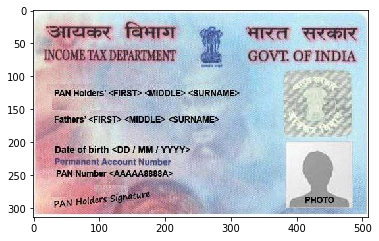

In [5]:
img = mpimg.imread('doc_data/data/pan_card/1.jpg')
imgplot = plt.imshow(img)
plt.show()

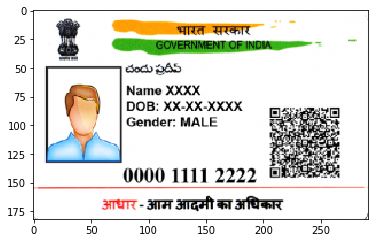

In [6]:
img = mpimg.imread('doc_data/data/aadhar_card/1.jpg')
imgplot = plt.imshow(img)
plt.show()

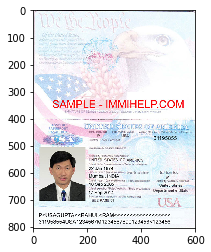

In [8]:
img = mpimg.imread('doc_data/data/passport/1.jpg')
imgplot = plt.imshow(img)
plt.show()

All dimensions are different need to make it consistent

In [0]:
import os

In [0]:
data_path = 'doc_data/data/'
documents = ['aadhar_card', 'pan_card', 'passport']

In [20]:
img_paths = []
for i in documents:
  file_path = os.path.join(data_path, i)
  l = os.listdir(file_path)
  print('{} - {}'.format(i, len(l)))
  for file in l:
    img_path = os.path.join(file_path, file)
    img_paths.append(img_path)

aadhar_card - 69
pan_card - 81
passport - 59


All the images have unequal number of examples, need to make it balanced, Also the count is low so need to augment it as well

In [21]:
img_paths[:5]

['doc_data/data/aadhar_card/44.jpg',
 'doc_data/data/aadhar_card/242.jpg',
 'doc_data/data/aadhar_card/116.jpg',
 'doc_data/data/aadhar_card/370.jpg',
 'doc_data/data/aadhar_card/530.jpg']

In [0]:
np.random.seed(0)
np.random.shuffle(img_paths)

In [23]:
len(img_paths)

209

In [27]:
img_paths[0].split('/')[-2]

'aadhar_card'

In [0]:
import cv2
from keras.preprocessing.image import img_to_array, ImageDataGenerator
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [0]:
def make_data_labels(image_paths):
  """Function to make the data and labels."""
  data = []
  labels = []
  for img_path in image_paths:
    img = cv2.imread(img_path)
    img = cv2.resize(img, (28, 28)) # resize the image
    img = img_to_array(img)
    data.append(img)
    
    label_name = img_path.split('/')[-2]
    if label_name == 'aadhar_card':
      label = 0
    elif label_name == 'pan_card':
      label = 1
    else:
      label = 2
    labels.append(label)
  data = np.array(data, dtype="float32") / 255.0 # normalize the images
  labels = to_categorical(np.asarray(labels), num_classes=3)
  return data, labels

In [90]:
data, labels = make_data_labels(img_paths)
data.shape, labels.shape

((209, 28, 28, 3), (209, 3))

In [0]:
def data_augmentation():
  """Function for data augmentation."""
  aug = ImageDataGenerator(
      zca_epsilon=1e-9,
      rotation_range=270,
      width_shift_range=2,
      height_shift_range=2,
      brightness_range=(-0.5, 1.5),
      shear_range=0.2,
      zoom_range=0.4,
      channel_shift_range=0.2,
      fill_mode='nearest',
      horizontal_flip=1,
      vertical_flip=1    
  )
  return aug

def data_augmentation_2():
  """Function for data augmentation 2."""
  aug = ImageDataGenerator(
      rotation_range=30,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode="nearest"
  )
  return aug

In [0]:
aug = data_augmentation_2()

In [93]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, stratify=list(labels), random_state=42, shuffle=True, test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((167, 28, 28, 3), (167, 3), (42, 28, 28, 3), (42, 3))

# Model

In [0]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense
from keras import backend as K
import keras

In [0]:
def build_model(width, height, depth, num_classes):
  """Function to build the model."""
  
  input_shape = (height, width, depth)
   
  # start
  model = Sequential()
  kernel_init = 'glorot_uniform'
  activ = 'relu'
  bias_init = 'zeros'
  filters_ = 32
  filter_size = (3, 3)
  strides = (1, 1)
  pad = 'same'
  dilate = (1, 1)
  pool_ = (2, 2)
  
  # setting blocks conv -> activation -> maxpool
  for i in range(1, 3):
    model.add(Conv2D(filters_*i, filter_size, strides=strides, padding=pad, input_shape=input_shape, kernel_initializer=kernel_init, bias_initializer=bias_init, dilation_rate=dilate ))
    model.add(Activation(activ))
    model.add(MaxPooling2D(pool_size=pool_))
    
  # blocks including Fully connected layer
  model.add(Flatten())
  model.add(Dense(300, kernel_initializer=kernel_init, bias_initializer=bias_init))
  model.add(Activation("relu"))
  
  # classifier layer
  model.add(Dense(num_classes))
  model.add(Activation("softmax"))
  
  return model

In [98]:
model = build_model(28, 28, 3, 3)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
activation_16 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_17 (Activation)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)              0         
__________

# Training

In [0]:
import matplotlib
matplotlib.use("Agg")
import random

In [0]:
epochs_ = 100
lr_init = 1e-4
batch_ = 32

In [0]:
# define the optimizer
opt = keras.optimizers.Adam(lr=lr_init, decay=(lr_init/epochs_))
loss = keras.losses.categorical_crossentropy

In [0]:
model.compile(loss=loss, optimizer='rmsprop', metrics=['accuracy'])

In [0]:
def plot_summary(H, epochs_):
  """Function to plot the training summary."""
  plt.style.use("ggplot")
  plt.figure(figsize=(9, 6))
  N = epochs_
  
  for i in zip(['loss', 'val_loss', 'acc', 'val_acc'], ['train_loss', 'val_loss', 'train_acc', 'val_acc']):
    plt.plot(np.arange(0, N), H.history[i[0]], label=i[1])
  plt.title("Training loss and Accuracy")
  plt.xlabel('Epoch #')
  plt.ylabel("Loss/Accuracy")
  plt.legend(loc="lower left")
  plt.show()

In [0]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [67]:
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [101]:
H = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=batch_),
    validation_data=(x_test, y_test),
    steps_per_epoch=100,
    epochs=epochs_,
    verbose=2
)

Epoch 1/100
 - 3s - loss: 1.0501 - acc: 0.5635 - val_loss: 1.0588 - val_acc: 0.5238
Epoch 2/100
 - 3s - loss: 0.9863 - acc: 0.5521 - val_loss: 1.0600 - val_acc: 0.6429
Epoch 3/100
 - 3s - loss: 0.9516 - acc: 0.5778 - val_loss: 1.0445 - val_acc: 0.5000
Epoch 4/100
 - 3s - loss: 0.9250 - acc: 0.5798 - val_loss: 1.0598 - val_acc: 0.3810
Epoch 5/100
 - 3s - loss: 0.8891 - acc: 0.5788 - val_loss: 1.0618 - val_acc: 0.3810
Epoch 6/100
 - 3s - loss: 0.9108 - acc: 0.5720 - val_loss: 1.0131 - val_acc: 0.4524
Epoch 7/100
 - 4s - loss: 1.0670 - acc: 0.5576 - val_loss: 1.0425 - val_acc: 0.6667
Epoch 8/100
 - 3s - loss: 0.9068 - acc: 0.5871 - val_loss: 1.0324 - val_acc: 0.7143
Epoch 9/100
 - 3s - loss: 0.9115 - acc: 0.6027 - val_loss: 1.0333 - val_acc: 0.4524
Epoch 10/100
 - 3s - loss: 0.9276 - acc: 0.5819 - val_loss: 1.0337 - val_acc: 0.6429
Epoch 11/100
 - 3s - loss: 0.8889 - acc: 0.6068 - val_loss: 1.0242 - val_acc: 0.5238
Epoch 12/100
 - 3s - loss: 0.8953 - acc: 0.5936 - val_loss: 1.0396 - val_a

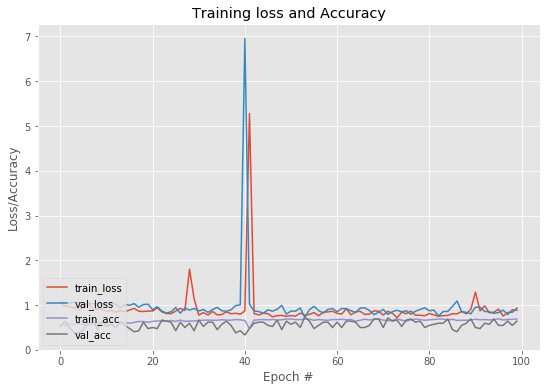

In [102]:
plot_summary(H, epochs_)

Lets try with some other network architecture

# Model LeNet

In [0]:
def LeNet(width, height, depth, classes):
  """Function to build LeNet model."""
  
  inputShape = (height, width, depth)
  
  model = Sequential()
  
  # model block 1
  model.add(Conv2D(20, (5, 5), padding="same", input_shape=inputShape))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  # model block 2
  model.add(Conv2D(50, (5, 5), padding="same"))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  
  # FC layer
  model.add(Flatten())
  model.add(Dense(500))
  model.add(Activation("relu"))
  
  # classifier layer
  model.add(Dense(classes))
  model.add(Activation("softmax"))
  
  return model

In [0]:
epochs_ = 50
init_lr = 1e-3
batch_ = 32

In [107]:
le_net = build_model(28, 28, 3, 3)
le_net.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        896       
_________________________________________________________________
activation_20 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_21 (Activation)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3136)              0         
__________

In [0]:
opt = keras.optimizers.Adam(lr=init_lr, decay=init_lr/epochs_)

In [0]:
le_net.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

In [0]:
H = le_net.fit_generator(
    aug.flow(x_train, y_train, batch_size=batch_),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train)//batch_,
    epochs=epochs_,
    verbose=2
)

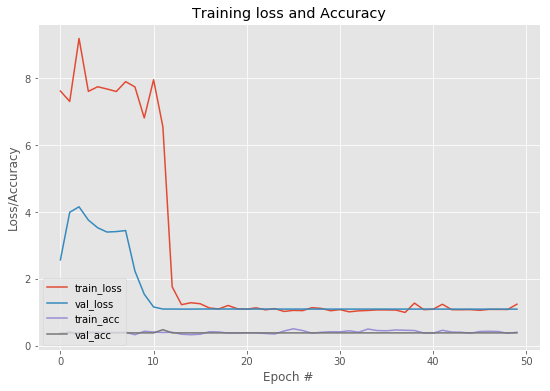

In [114]:
plot_summary(H, epochs_)

Okay, even here it is not learning. Lets modify the data augmentations and check.

In [0]:
epochs_ = 100
init_lr = 1e-3
batch_ = 32

In [0]:
le_net = build_model(28, 28, 3, 3)
le_net.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])

In [0]:
H = le_net.fit_generator(
    aug.flow(x_train, y_train, batch_size=batch_),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train)//batch_,
    epochs=epochs_,
    verbose=2
)

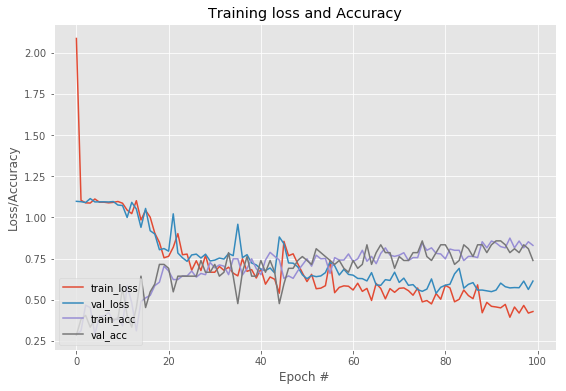

In [120]:
plot_summary(H, epochs_)

Lets try with RMSprop

In [0]:
le_net = build_model(28, 28, 3, 3)
le_net.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=["accuracy"])

In [0]:
H = le_net.fit_generator(
    aug.flow(x_train, y_train, batch_size=batch_),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train)//batch_,
    epochs=epochs_,
    verbose=2
)

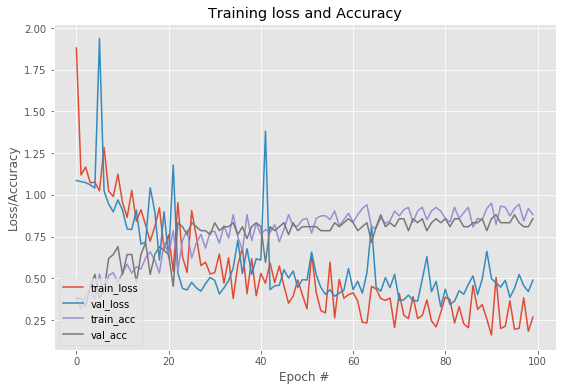

In [123]:
plot_summary(H, epochs_)

RMSprop performs better than Adam, what would happen if run on more epochs

In [0]:
H = le_net.fit_generator(
    aug.flow(x_train, y_train, batch_size=batch_),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train)//batch_,
    epochs=epochs_,
    verbose=2
)

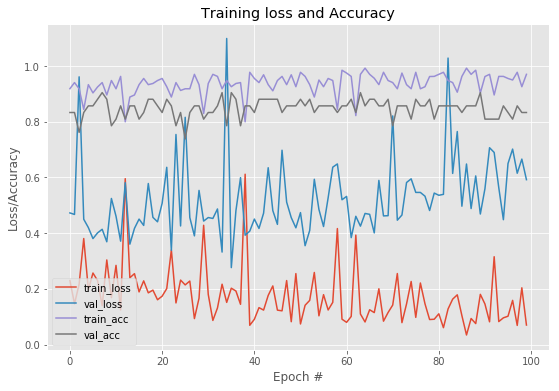

In [125]:
plot_summary(H, epochs_)

It is overfitting !